In [23]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

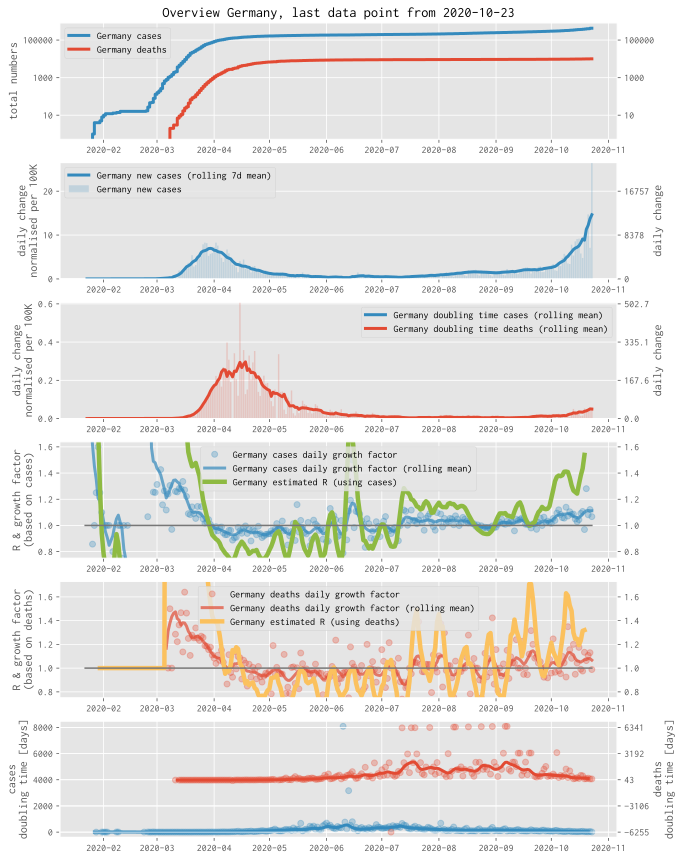

In [24]:
ov.LW=1
ov.overview("Germany");

In [25]:
cases, deaths = ov.get_country_data("Germany")

<bound method Artist.set of <Figure size 432x288 with 1 Axes>>

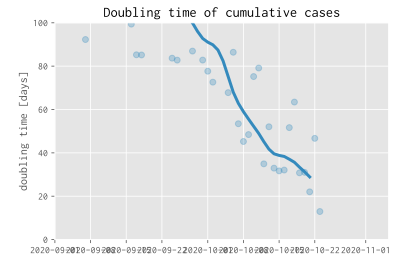

In [26]:
fig, ax = plt.subplots()
ax = ov.plot_doubling_time(ax=ax, series=cases, color="C1")
ax.set_ylim([0, 100])
ax.set_title("Doubling time of cumulative cases")
ax.set_xlim(left=pd.to_datetime("2020-09-01"))
fig.set

(18475.0, 18570.1)

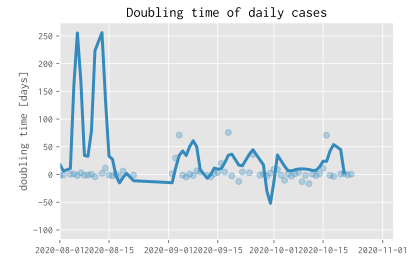

In [27]:
fig, ax = plt.subplots()
ax = ov.plot_doubling_time(ax=ax, series=cases.diff(), color="C1")
#ax.set_ylim([0, 20])
ax.set_title("Doubling time of daily cases")
ax.set_xlim(left=pd.to_datetime("2020-08-01"))

In [28]:
LW = 3

def plot_doubling_time_daily(ax, series, color, minchange=0.5, labels=None, debug=False):
    """Plot doubling time of series, assuming series is daily cases/deaths as
    function of days.

    Returns axis.

    See plot_time_step for documentation on other parameters.
    """

    if labels is None:
        labels = "", ""
    region, label = labels

    (dtime, dtime_label), (dtime_smooth, dtime_smooth_label) = \
        ov.compute_doubling_time(series, minchange=minchange, debug=debug, labels=labels)

    if dtime is None:
        if debug:
            print(dtime_label)
        return ax

    ax.plot(dtime.index, dtime.values, 'o', color=color, alpha=0.3, label=dtime_label)

    # good to take maximum value from here
    dtime_smooth.replace(np.inf, np.nan, inplace=True)  # get rid of x/0 results, which affect max()
    ymax = min(dtime_smooth.max()*1.5, 5000)  # China has doubling time of 3000 in between

    ## Adding a little bit of additional smoothing just for visual effects
    dtime_smooth2 = dtime_smooth.rolling(3, win_type='gaussian', min_periods=1, center=True).mean(std=1)

    # ax.set_ylim(0, max(ymax, ax.get_ylim()[1]))     # since we combine two plots, let's take another one into account
    ax.plot(dtime_smooth2.index, dtime_smooth2.values, "-", color=color, alpha=1.0,
            label=dtime_smooth_label,
            linewidth=LW)
    ax.set_ylabel(f"{labels[1]}\ndoubling time [days]")
    return ax


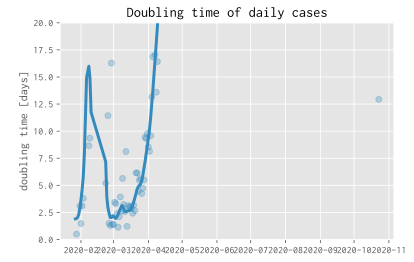

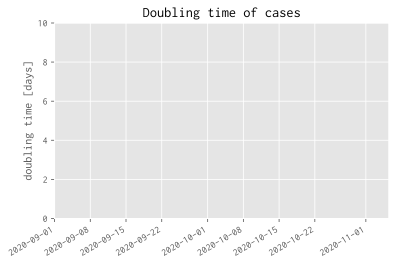

In [29]:
fig, ax = plt.subplots()
ax = plot_doubling_time_daily(ax=ax, series=cases, color="C1")
ax.set_ylim([0, 20])
ax.set_title("Doubling time of daily cases")
# ax.set_xlim(left=pd.to_datetime("2020-09-01"))
fig, ax = plt.subplots()
ax = ov.plot_doubling_time(ax=ax, series=cases, color="C2")
ax.set_ylim([0, 10])
ax.set_title("Doubling time of cases")
ax.set_xlim(left=pd.to_datetime("2020-09-01"))
fig.autofmt_xdate()

# Look at doubling time on fake data

In [30]:
dates = pd.date_range('2020-10-01', '2020-10-31')
dates

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='D')

In [31]:
t = np.arange(0, 31)
R = 2  # reproduction number
R = 0.5  # reproduction number
tau = 4  # days
y0 = 100
y = y0 * R**((t-10) / tau)
cases = pd.Series(index=dates, data=y).cumsum()
# cases = pd.Series(index=dates, data=y)
#y[0:10] = y0

In [32]:
cases.head()

2020-10-01     565.685425
2020-10-02    1041.368271
2020-10-03    1441.368271
2020-10-04    1777.726837
2020-10-05    2060.569550
Freq: D, dtype: float64

No handles with labels found to put in legend.


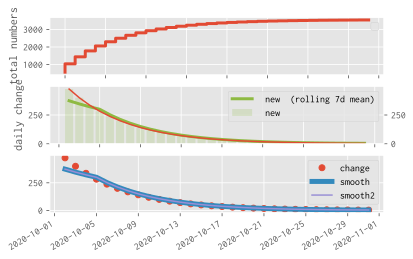

In [33]:
import importlib
import oscovida 
oscovida = importlib.reload(oscovida)

fig, axes = plt.subplots(3, 1)
oscovida.plot_time_step(ax=axes[0], series=cases)
axes[0].set_yscale('linear')
oscovida.plot_daily_change(ax=axes[1], series=cases,color="C5")

change, smooth, smooth2 = ov.compute_daily_change(cases)

axes[1].plot(change[0].index, change[0].values, label="change")
axes[2].plot(change[0].index, change[0].values, 'o', label="change")
axes[2].plot(smooth[0].index, smooth[0].values, label="smooth", linewidth=5)
axes[2].plot(smooth2[0].index, smooth2[0].values, label="smooth2")
axes[2].legend()
fig.autofmt_xdate()

(0.0, 10.0)

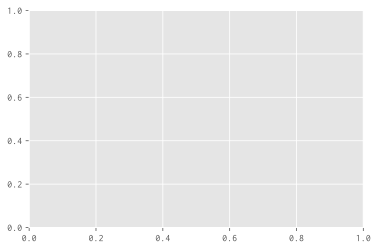

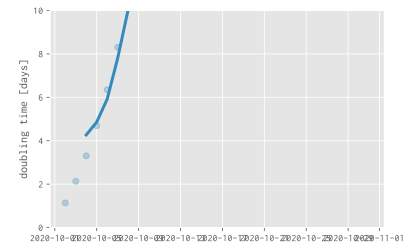

In [34]:
fig, ax = plt.subplots()
ret = ov.plot_doubling_time(ax=ax, series=cases.diff().rolling(7).mean(), color="C1")
#ax.set_ylim(0, 10)
fig, ax = plt.subplots()
plot_doubling_time_daily(ax=ax, series=cases, color="C1")
ax.set_ylim(0, 10)


In [35]:
cases.diff()

2020-10-01           NaN
2020-10-02    475.682846
2020-10-03    400.000000
2020-10-04    336.358566
2020-10-05    282.842712
2020-10-06    237.841423
2020-10-07    200.000000
2020-10-08    168.179283
2020-10-09    141.421356
2020-10-10    118.920712
2020-10-11    100.000000
2020-10-12     84.089642
2020-10-13     70.710678
2020-10-14     59.460356
2020-10-15     50.000000
2020-10-16     42.044821
2020-10-17     35.355339
2020-10-18     29.730178
2020-10-19     25.000000
2020-10-20     21.022410
2020-10-21     17.677670
2020-10-22     14.865089
2020-10-23     12.500000
2020-10-24     10.511205
2020-10-25      8.838835
2020-10-26      7.432544
2020-10-27      6.250000
2020-10-28      5.255603
2020-10-29      4.419417
2020-10-30      3.716272
2020-10-31      3.125000
Freq: D, dtype: float64

Text(0.5, 1.0, 'Doubling time of daily cases')

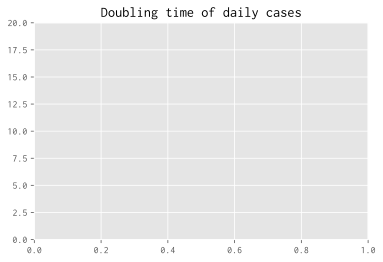

In [36]:
fig, ax = plt.subplots()
ax = plot_doubling_time_daily(ax=ax, series=cases.diff().rolling(7).mean(), color="C1")
ax.set_ylim([0, 20])
ax.set_title("Doubling time of daily cases")
# ax.set_xlim(left=pd.to_datetime("2020-09-01"))

In [37]:
oscovida.compute_doubling_time(cases.diff())

((None, 'Cannot compute ratio'), (None, None))

In [67]:
def compute_doubling_time_daily(series, minchange=0.5, debug=True, region=""):

    """
    Compute and return doubling time of (assumed exponential) daily growth.

    """

    
    ratio = series.pct_change() + 1  # computes q2/q1 
    #ratio_smooth = series.rolling(7, center=True, win_type='gaussian',
    #                              min_periods=7).mean(std=3).pct_change() + 1

    if debug:
        print(f"len(ratio) = {len(ratio.dropna())}, {ratio}")
        print(f"len(ratio_smooth) = {len(ratio_smooth.dropna())}, {ratio_smooth}")


    # can have np.inf and np.nan at this point in ratio
    # if those are the only values, then we should stop
    ratio.replace(np.inf, np.nan, inplace=True)
    if ratio.isna().all():
        return (None, "Cannot compute ratio"), (None, None)

    #ratio_smooth.replace(np.inf, np.nan, inplace=True)
    #if ratio_smooth.isna().all():
        # no useful data in smooth line, but data for dots is okay
        # Give up anyway
    #    return (None, "Cannot compute smooth ratio"), (None, None)

    # computes q2/q1
    # compute the actual doubling time
    dtime = ov.double_time_exponential(ratio, t2_minus_t1=1)
    #dtime_smooth = ov.double_time_exponential(ratio_smooth, t2_minus_t1=1)

    if debug:
        print(f"len(dtime) = {len(dtime.dropna())}, {dtime}")
        print(f"len(dtime_smooth) = {len(dtime_smooth.dropna())}, {dtime_smooth}")

    # can have np.inf and np.nan at this point in dtime_smooth and dtime
    # if those are the only values, then we should stop
    #dtime_smooth.replace(np.inf, np.nan, inplace=True)
    #if dtime_smooth.isna().all():
        # We could at this point carry on and return the dtime, but not dtime_smooth.
        # This may not be a common use case and not worth the extra complications.
    #    return (None, "Cannot compute doubling time"), (None, None)

    dtime.replace(np.inf, np.nan, inplace=True)
    if dtime.isna().all():
        raise ValueError("Cannot compute doubling time - not enough change?")
    #    return (None, "Cannot compute smooth doubling time"), (None, None)

    #dtime_label = region + " doubling time " + label
    #dtime_smooth_label = dtime_label + ' 7-day rolling mean (stddev=3)'
    # simplified label
    #dtime_smooth_label = dtime_label + ' (rolling mean)'

    # return (dtime, dtime_label), (dtime_smooth, dtime_smooth_label)
    return dtime


In [68]:
cases, deaths = ov.get_country_data("Germany")

In [81]:
# Introduce smoothing
smooth = cases.rolling(7, min_periods=1, center=True
                      ).mean()
                    #.rolling(7, min_periods=1, center=True, win_type='gaussian').mean(std=3)

dtime = compute_doubling_time_daily(smooth.diff(), debug=False);

posselect = dtime.values > 0
negselect = dtime.values < 0


In [82]:
dtime

2020-01-22          NaN
2020-01-23          NaN
2020-01-24          NaN
2020-01-25     0.582680
2020-01-26    16.286500
                ...    
2020-10-19   -21.856822
2020-10-20     2.799942
2020-10-21    -0.822303
2020-10-22     3.742772
2020-10-23     9.943883
Freq: D, Name: Germany cases, Length: 276, dtype: float64

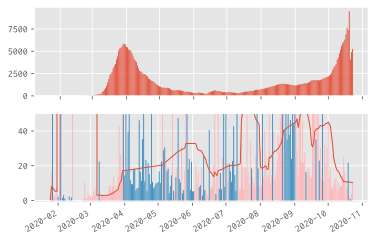

In [90]:
fig, ax = plt.subplots(2)
ax[0].bar(smooth.index, smooth.diff().values)
ax[1].bar(dtime[posselect].index, dtime[posselect].values, color='C6')
ax[1].plot(dtime[posselect].rolling(14, min_periods=1, win_type='gaussian').mean(std=7), color='C0', linewidth=1)
ax[1].bar(dtime[negselect].index, dtime[negselect].values*(-1), color='C1')
#ax[0].set_xlim(['2020-10-01', '2020-10-31'])
ax[1].set_ylim(-1, 50)
#ax[1].set_xlim(['2020-10-01', '2020-10-31'])
fig.autofmt_xdate()

In [72]:
dtime.max()

780414346020670.2

In [46]:
(dtime>1).sum()

0

In [47]:
dtime

2020-10-01    NaN
2020-10-02    NaN
2020-10-03   -4.0
2020-10-04   -4.0
2020-10-05   -4.0
2020-10-06   -4.0
2020-10-07   -4.0
2020-10-08   -4.0
2020-10-09   -4.0
2020-10-10   -4.0
2020-10-11   -4.0
2020-10-12   -4.0
2020-10-13   -4.0
2020-10-14   -4.0
2020-10-15   -4.0
2020-10-16   -4.0
2020-10-17   -4.0
2020-10-18   -4.0
2020-10-19   -4.0
2020-10-20   -4.0
2020-10-21   -4.0
2020-10-22   -4.0
2020-10-23   -4.0
2020-10-24   -4.0
2020-10-25   -4.0
2020-10-26   -4.0
2020-10-27   -4.0
2020-10-28   -4.0
2020-10-29   -4.0
2020-10-30   -4.0
2020-10-31   -4.0
Freq: D, dtype: float64